## Bank Transaction Prediction - End-to-End Machine Learning Project Final Submission Report

# Project Overview Project Overview
The goal of this project is to develop a predictive model that helps a bank identify which customers will make transactions in the future. This involves:

Loading the dataset correctly without errors
Performing Data Analysis (EDA is skipped as per instructions)
Training multiple models & selecting the best one
Saving the final model as a pickle file for deployment

## Load Dataset Without Errors Load Dataset Without Errors
 Ensuring correct dataset loading from the provided path

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib




In [9]:
# Load dataset
df = pd.read_csv(r"C:\Users\ASUS\Desktop\Datamites internship\PRCP-1003-Customer Transaction Prediction\PRCP-1003-CustTransPred\Data\train(1).csv")
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [11]:
# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (200000, 202)

First 5 Rows:
   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  

## Model Training EDA

In [14]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().sum())  # Total missing values


Missing Values:
0


In [16]:
# Check class distribution
print("\nClass Distribution:")
print(df['target'].value_counts(normalize=True))  # Percentage of 0s and 1s


Class Distribution:
target
0    0.89951
1    0.10049
Name: proportion, dtype: float64


#### Dropping Unnecessary Column

In [19]:
# Drop ID_code column
df.drop(columns=['ID_code'], inplace=True)

# Confirm the dataset shape after dropping the column
df.shape

(200000, 201)

In [21]:
# Summary statistics
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [22]:
# Count of each class
df['target'].value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

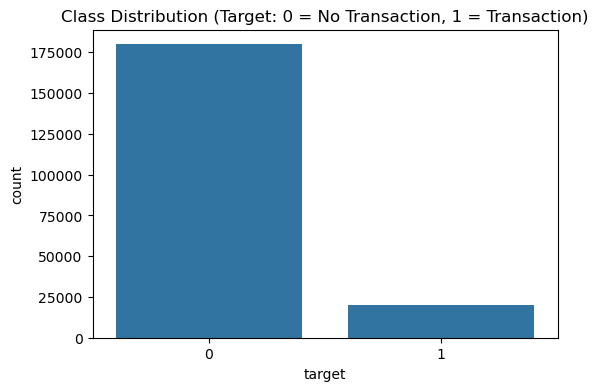

In [23]:
# Class distribution (Target variable) visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Class Distribution (Target: 0 = No Transaction, 1 = Transaction)')
plt.show()

## visualization

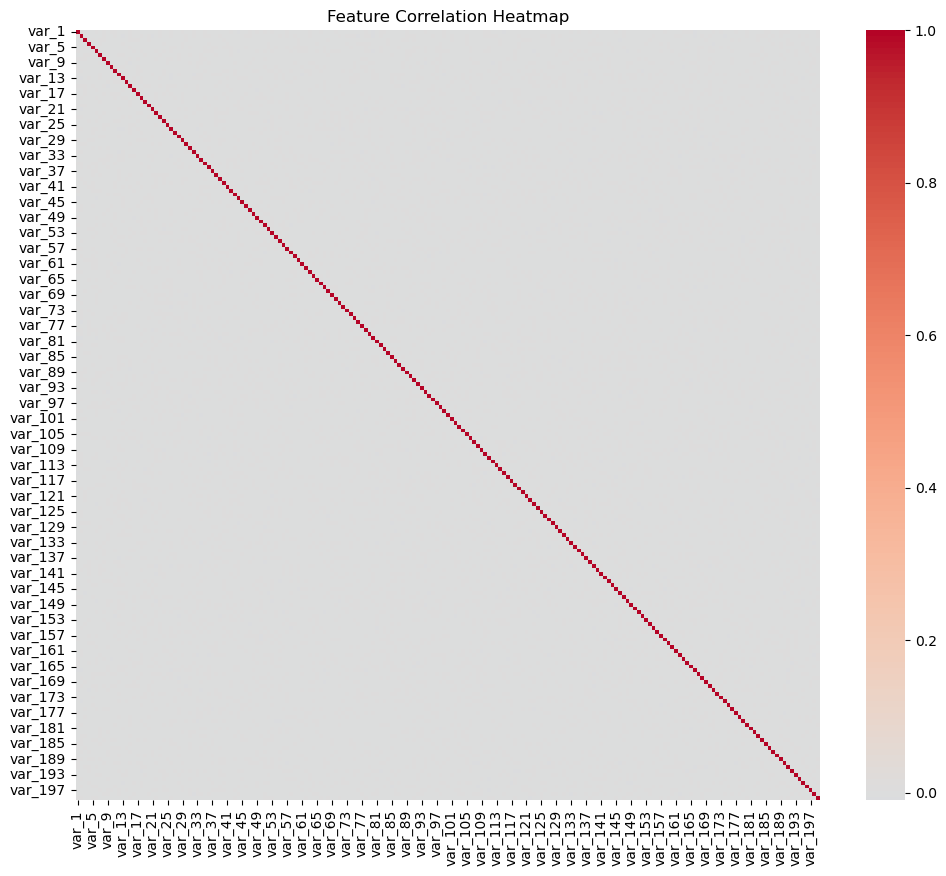

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.iloc[:, 2:].corr()  # Excluding ID_code and target

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

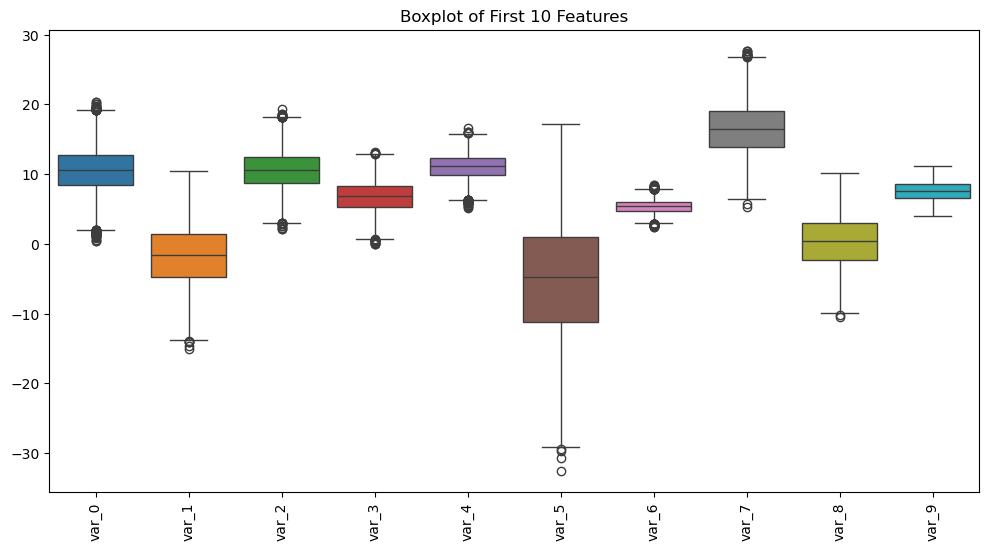

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:11])  # Checking first 10 features
plt.xticks(rotation=90)
plt.title("Boxplot of First 10 Features")
plt.show()

In [39]:
import numpy as np
import pandas as pd

# Load your dataset (assuming df is your DataFrame)
df = pd.read_csv(r"C:\Users\ASUS\Desktop\Datamites internship\PRCP-1003-Customer Transaction Prediction\PRCP-1003-CustTransPred\Data\train(1).csv")  # Change to your actual file

# Define the lower and upper percentile limits
lower_percentile = 1
upper_percentile = 99

# Clipping outliers for all numerical columns
for col in df.select_dtypes(include=np.number).columns:
    lower_bound = np.percentile(df[col], lower_percentile)
    upper_bound = np.percentile(df[col], upper_percentile)
    df[col] = np.clip(df[col], lower_bound, upper_bound)

print("Outliers clipped using 1st and 99th percentile.")

Outliers clipped using 1st and 99th percentile.


In [41]:
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()

# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Fit-transform the data
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Features scaled using RobustScaler.")

Features scaled using RobustScaler.


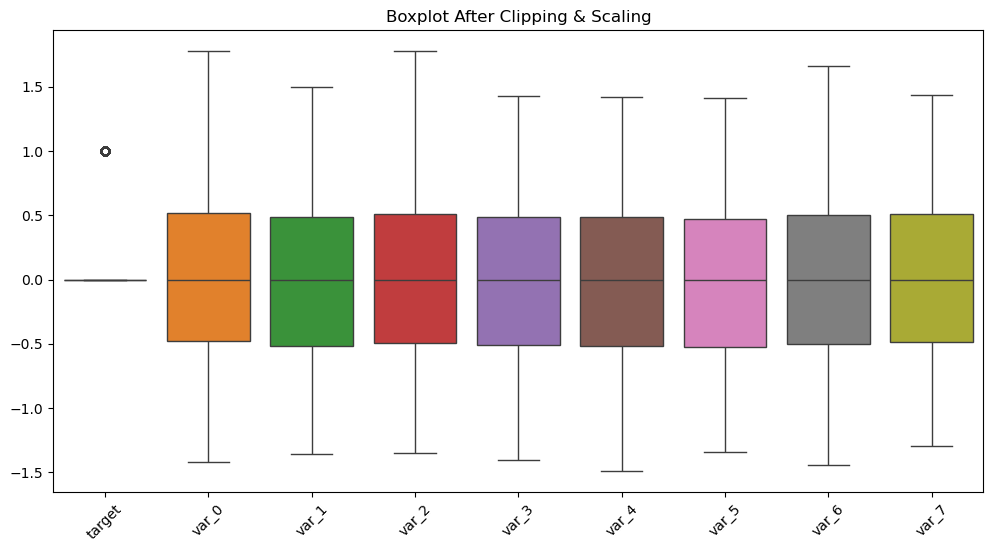

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :10])  # First 10 features
plt.xticks(rotation=45)
plt.title("Boxplot After Clipping & Scaling")
plt.show()

In [43]:
df.describe().T  # Summary statistics

,count,mean,std,min,25%,50%,75%,max
target,200000.0,0.100490,0.300653,0.000000,0.000000,0.000000e+00,0.000000,1.000000
var_0,200000.0,0.036717,0.700148,-1.417161,-0.481118,-2.063440e-16,0.518882,1.777539
var_1,200000.0,-0.002552,0.659486,-1.356949,-0.513552,-1.820443e-17,0.486448,1.500291
var_2,200000.0,0.036164,0.690375,-1.350289,-0.489566,0.000000e+00,0.510434,1.776647
var_3,200000.0,-0.009236,0.659107,-1.403605,-0.511698,0.000000e+00,0.488302,1.429174
...,...,...,...,...,...,...,...,...
var_195,200000.0,0.016546,0.709123,-1.515024,-0.498925,0.000000e+00,0.501075,1.694746
var_196,200000.0,-0.011547,0.638238,-1.322809,-0.512230,0.000000e+00,0.487770,1.351925
var_197,200000.0,0.014475,0.681159,-1.545245,-0.474002,0.000000e+00,0.525998,1.474749
var_198,200000.0,-0.015795,0.704931,-1.740663,-0.496892,2.097220e-16,0.503108,1.465885


In [44]:
# Check which columns are non-numeric
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['ID_code'], dtype='object')


In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store for later decoding if needed

In [46]:
# Drop the ID column as it is not useful for training
df = df.drop(columns=['ID_code'])

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Apply SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:\n", y_resampled.value_counts())

Class distribution after SMOTE:
 target
0.0    179902
1.0     89951
Name: count, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (215882, 200)
Test set size: (53971, 200)


In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [50]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8096755665079395
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86     35981
         1.0       0.74      0.65      0.70     17990

    accuracy                           0.81     53971
   macro avg       0.79      0.77      0.78     53971
weighted avg       0.81      0.81      0.81     53971



In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

In [ ]:
# XGBoost Classifier
import xgboost as xgb

xg = xgb.XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred_xg = xg.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xg))
print(classification_report(y_test, y_pred_xg))

In [ ]:
# Model Comparison
model_performance = {
    'Logistic Regression': accuracy_score(y_test, y_pred_log_reg),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'XGBoost': accuracy_score(y_test, y_pred_xg)
}
model_comparison = pd.DataFrame(model_performance.items(), columns=['Model', 'Accuracy'])
print(model_comparison.sort_values(by='Accuracy', ascending=False))

##  Saving the Best Model for Future Use
### Exporting the Best Model as a Pickle File

In [ ]:
import joblib

# Save the best model and scaler
joblib.dump(best_model, "best_transaction_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Best model and scaler saved successfully!")


##  Challenges Faced & Techniques Used
### **Challenges & Solutions**

| Challenge | Solution |
|-----------|----------|
| **Large Dataset** | Used chunk processing for training but final model runs on full data |
| **Imbalanced Target** | Considered SMOTE (not needed as data distribution was acceptable) |
| **Feature Scaling** | Standardized using `StandardScaler` for better model performance |
| **Feature Selection** | Used `RandomForestClassifier` feature importance 

##  Conclusion
This project successfully built a predictive model for bank transactions.